<!DOCTYPE html>
<html>
<head>
<style>
h1 {
  color:rgb(255, 20, 147);
  font-family: verdana;
  font-size: 300%;
}
</style>
</head>
<body>

<h1>THE BEGINNING STARTS FROM HERE</h1>

</body>
</html>

In [4]:
import pandas as pd
df = pd.read_csv("/Users/mvbasxhr/Cool Stuff/inequalityExplorer/98-401-X2021006_eng_CSV/98-401-X2021006_English_CSV_data_Ontario.csv",encoding='latin-1')
subset1 = df.loc[((df['CHARACTERISTIC_ID'] == 180)) | 
                    ((df['CHARACTERISTIC_ID'] >= 183) & 
                    (df['CHARACTERISTIC_ID'] <= 196)) |
                    ((df['CHARACTERISTIC_ID'] >= 10) & 
                    (df['CHARACTERISTIC_ID'] <= 12)) |
                    ((df['CHARACTERISTIC_ID'] >= 14) & 
                    (df['CHARACTERISTIC_ID'] <= 23)) |
                    ((df['CHARACTERISTIC_ID'] >= 25) & 
                    (df['CHARACTERISTIC_ID'] <= 28)) |
                    ((df['CHARACTERISTIC_ID'] >= 30) & 
                    (df['CHARACTERISTIC_ID'] <= 33)) |
                    (df['CHARACTERISTIC_ID'] == 379) |
                    (df['CHARACTERISTIC_ID'] == 489) |
                    (df['CHARACTERISTIC_ID'] == 493) |
                    (df['CHARACTERISTIC_ID'] == 596) |
                    (df['CHARACTERISTIC_ID'] == 600) |
                    (df['CHARACTERISTIC_ID'] == 611) |
                    (df['CHARACTERISTIC_ID'] == 615) |
                    (df['CHARACTERISTIC_ID'] == 617) |
                    (df['CHARACTERISTIC_ID'] == 621) |
                    (df['CHARACTERISTIC_ID'] == 695) |
                    (df['CHARACTERISTIC_ID'] == 721) |
                    (df['CHARACTERISTIC_ID'] == 831) |
                    (df['CHARACTERISTIC_ID'] == 835) |
                    (df['CHARACTERISTIC_ID'] == 938) |
                    (df['CHARACTERISTIC_ID'] == 942) |
                    (df['CHARACTERISTIC_ID'] == 953) |
                    (df['CHARACTERISTIC_ID'] == 957) |
                    (df['CHARACTERISTIC_ID'] == 959) |
                    (df['CHARACTERISTIC_ID'] == 963) |
                    (df['CHARACTERISTIC_ID'] == 1037),
                    ['DGUID',
                     'GEO_LEVEL',
                     'GEO_NAME',
                     'CHARACTERISTIC_ID',
                     'CHARACTERISTIC_NAME',
                     'C1_COUNT_TOTAL',
                     'C2_COUNT_MEN+',
                     'C3_COUNT_WOMEN+']]
pivoted_s = subset1.pivot(index=['DGUID'], columns=['CHARACTERISTIC_ID','CHARACTERISTIC_NAME'], values=['C1_COUNT_TOTAL','C2_COUNT_MEN+','C3_COUNT_WOMEN+'])
pivoted_s = pivoted_s.reset_index()
geoNames = df.loc[:,['DGUID','GEO_NAME','GEO_LEVEL']]
finalz = pd.merge(geoNames, pivoted_s, how='outer', left_on=geoNames.DGUID, right_on=pivoted_s.DGUID)  # doing outer join so that we dont drop any NAs 
finalz

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
import pandas as pd
df = pd.read_csv("/Users/mvbasxhr/Cool Stuff/inequalityExplorer/98-401-X2021006_eng_CSV/98-401-X2021006_English_CSV_data_Ontario.csv",encoding='latin-1')
df.shape
df.head(3)

/var/folders/k_/h4ll7zh10pb0p9z2t0kh6cm80000gn/T/ipykernel_3992/1144017361.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/mvbasxhr/Cool Stuff/inequalityExplorer/98-401-X2021006_eng_CSV/98-401-X2021006_English_CSV_data_Ontario.csv",encoding='latin-1')


CENSUS_YEAR           DGUID  ALT_GEO_CODE GEO_LEVEL GEO_NAME  TNR_SF  \
0         2021  2021A000011124             1   Country   Canada     3.1   
1         2021  2021A000011124             1   Country   Canada     3.1   
2         2021  2021A000011124             1   Country   Canada     3.1   

   TNR_LF  DATA_QUALITY_FLAG  CHARACTERISTIC_ID  \
0     4.3              20000                  1   
1     4.3              20000                  2   
2     4.3              20000                  3   

                          CHARACTERISTIC_NAME  ...  C2_COUNT_MEN+  SYMBOL.1  \
0                            Population, 2021  ...            NaN       ...   
1                            Population, 2016  ...            NaN       ...   
2  Population percentage change, 2016 to 2021  ...            NaN       ...   

  C3_COUNT_WOMEN+  SYMBOL.2 C10_RATE_TOTAL  SYMBOL.3 C11_RATE_MEN+  SYMBOL.4  \
0             NaN       ...            NaN       ...           NaN       ...   
1             NaN       ...            NaN       ...           NaN       ...   
2             NaN       ...            5.2       NaN           NaN       ...   

  C12_RATE_WOMEN+  SYMBOL.5  
0             NaN       ...  
1             NaN       ...  
2             NaN       ...  

[3 rows x 23 columns]

In [ ]:
df.shape

(40994360, 23)

In [ ]:
df.GEO_LEVEL.unique()

array(['Country', 'Province', 'Census division', 'Census subdivision',
       'Dissemination area'], dtype=object)

In [ ]:
df.GEO_LEVEL.value_counts()

Dissemination area    39929469
Census subdivision      968018
Census division          92919
Country                   1977
Province                  1977
Name: GEO_LEVEL, dtype: int64

In [ ]:
z=df
z.drop_duplicates(subset='DGUID').GEO_LEVEL.value_counts()

Dissemination area    20197
Census subdivision      490
Census division          47
Country                   1
Province                  1
Name: GEO_LEVEL, dtype: int64

In [ ]:
z.loc[ z.GEO_LEVEL=='Dissemination area',]

KeyboardInterrupt: 

In [ ]:
z.loc[ z.GEO_LEVEL=='Dissemination area','DGUID']

7908        2021S051235010159
7909        2021S051235010159
7910        2021S051235010159
7911        2021S051235010159
7912        2021S051235010159
                  ...        
40993090    2021S051235580479
40993091    2021S051235580479
40993092    2021S051235580479
40993093    2021S051235580479
40993094    2021S051235580479
Name: DGUID, Length: 39929469, dtype: object

In [ ]:
len('2021S051235010159')

17

In [ ]:
for dguid in z.loc[ z.GEO_LEVEL=='Dissemination area','DGUID'].values:
    if len(dguid)!=17:
        print('False')
    

KeyboardInterrupt: 

In [ ]:
singleDGUIDSdf = df.drop_duplicates(subset='DGUID')
singleDGUIDSdf.to_csv = ('singleDGUIDSdf.csv')

In [ ]:
DA_Dguids = df.loc[ df.GEO_LEVEL=='Dissemination area','DGUID']

In [ ]:
type(DA_Dguids)

pandas.core.series.Series

In [ ]:
DA_Dguids.drop_duplicates(inplace=True)

In [ ]:
z.loc[ z.GEO_LEVEL=='Dissemination area','DGUID'].values:
    if len(dguid)!=17:
        print('False')
    

In [ ]:
df.DGUID.nunique()

20736

In [ ]:
df.CHARACTERISTIC_ID.nunique()

1977

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40994360 entries, 0 to 40994359
Data columns (total 23 columns):
 #   Column               Dtype  
---  ------               -----  
 0   CENSUS_YEAR          int64  
 1   DGUID                object 
 2   ALT_GEO_CODE         int64  
 3   GEO_LEVEL            object 
 4   GEO_NAME             object 
 5   TNR_SF               float64
 6   TNR_LF               float64
 7   DATA_QUALITY_FLAG    int64  
 8   CHARACTERISTIC_ID    int64  
 9   CHARACTERISTIC_NAME  object 
 10  CHARACTERISTIC_NOTE  float64
 11  C1_COUNT_TOTAL       float64
 12  SYMBOL               object 
 13  C2_COUNT_MEN+        float64
 14  SYMBOL.1             object 
 15  C3_COUNT_WOMEN+      float64
 16  SYMBOL.2             object 
 17  C10_RATE_TOTAL       float64
 18  SYMBOL.3             object 
 19  C11_RATE_MEN+        float64
 20  SYMBOL.4             object 
 21  C12_RATE_WOMEN+      float64
 22  SYMBOL.5             object 
dtypes: float64(9), int64(4), objec

In [ ]:
#subset1 = df_CT.loc[(df_CT['CHARACTERISTIC_ID'] >= 180) & (df_CT['CHARACTERISTIC_ID'] <= 197),['DGUID','GEO_LEVEL','GEO_NAME','CHARACTERISTIC_ID','CHARACTERISTIC_NAME','C1_COUNT_TOTAL','C10_RATE_TOTAL']]
subset1 = df.loc[((df['CHARACTERISTIC_ID'] == 180)) | 
                    ((df['CHARACTERISTIC_ID'] >= 183) & 
                    (df['CHARACTERISTIC_ID'] <= 196)) |
                    ((df['CHARACTERISTIC_ID'] >= 10) & 
                    (df['CHARACTERISTIC_ID'] <= 12)) |
                    ((df['CHARACTERISTIC_ID'] >= 14) & 
                    (df['CHARACTERISTIC_ID'] <= 23)) |
                    ((df['CHARACTERISTIC_ID'] >= 25) & 
                    (df['CHARACTERISTIC_ID'] <= 28)) |
                    ((df['CHARACTERISTIC_ID'] >= 30) & 
                    (df['CHARACTERISTIC_ID'] <= 33)) |
                    (df['CHARACTERISTIC_ID'] == 379) |
                    (df['CHARACTERISTIC_ID'] == 489) |
                    (df['CHARACTERISTIC_ID'] == 493) |
                    (df['CHARACTERISTIC_ID'] == 596) |
                    (df['CHARACTERISTIC_ID'] == 600) |
                    (df['CHARACTERISTIC_ID'] == 611) |
                    (df['CHARACTERISTIC_ID'] == 615) |
                    (df['CHARACTERISTIC_ID'] == 617) |
                    (df['CHARACTERISTIC_ID'] == 621) |
                    (df['CHARACTERISTIC_ID'] == 695) |
                    (df['CHARACTERISTIC_ID'] == 721) |
                    (df['CHARACTERISTIC_ID'] == 831) |
                    (df['CHARACTERISTIC_ID'] == 835) |
                    (df['CHARACTERISTIC_ID'] == 938) |
                    (df['CHARACTERISTIC_ID'] == 942) |
                    (df['CHARACTERISTIC_ID'] == 953) |
                    (df['CHARACTERISTIC_ID'] == 957) |
                    (df['CHARACTERISTIC_ID'] == 959) |
                    (df['CHARACTERISTIC_ID'] == 963) |
                    (df['CHARACTERISTIC_ID'] == 1037),
                    ['DGUID',
                     'GEO_LEVEL',
                     'GEO_NAME',
                     'CHARACTERISTIC_ID',
                     'CHARACTERISTIC_NAME',
                     'C1_COUNT_TOTAL',
                     'C2_COUNT_MEN+',
                     'C3_COUNT_WOMEN+']]

In [ ]:
print(*subset1.drop_duplicates(subset='CHARACTERISTIC_ID').CHARACTERISTIC_NAME)

    0 to 4 years     5 to 9 years     10 to 14 years     15 to 19 years     20 to 24 years     25 to 29 years     30 to 34 years     35 to 39 years     40 to 44 years     45 to 49 years     50 to 54 years     55 to 59 years     60 to 64 years     65 to 69 years     70 to 74 years     75 to 79 years     80 to 84 years       85 to 89 years       90 to 94 years       95 to 99 years       100 years and over Total - Employment income groups in 2020 for the population aged 15 years and over in private households - 100% data     Under $5,000 (including loss)     $5,000 to $9,999     $10,000 to $19,999     $20,000 to $29,999     $30,000 to $39,999     $40,000 to $49,999     $50,000 to $59,999     $60,000 to $69,999     $70,000 to $79,999     $80,000 to $89,999     $90,000 to $99,999     $100,000 and over       $100,000 to $124,999       $125,000 and over Total - Mother tongue for the total population excluding institutional residents - 100% data             Somali             Arabic           

<h1>This one is important<h1>

In [ ]:

pivoted_s = subset1.pivot(index=['DGUID'], columns=['CHARACTERISTIC_ID','CHARACTERISTIC_NAME'], values=['C1_COUNT_TOTAL','C2_COUNT_MEN+','C3_COUNT_WOMEN+'])
pivoted_s


C1_COUNT_TOTAL                                      \
CHARACTERISTIC_ID               10               11                 12     
CHARACTERISTIC_NAME     0 to 4 years     5 to 9 years     10 to 14 years   
DGUID                                                                      
2021A000011124             1831195.0        2054900.0          2126705.0   
2021A000235                 683515.0         764430.0           803850.0   
2021A00033501                 5565.0           6190.0             6275.0   
2021A00033502                 5025.0           5540.0             5540.0   
2021A00033506                48790.0          57410.0            60720.0   
...                              ...              ...                ...   
2021S051235580479                NaN              NaN                NaN   
2021S051235580483                NaN              NaN                NaN   
2021S051235580484               15.0             20.0               20.0   
2021S051235580485               40.0             30.0               30.0   
2021S051235580486               55.0             75.0               65.0   

                                                                              \
CHARACTERISTIC_ID                 14                 15                 16     
CHARACTERISTIC_NAME     15 to 19 years     20 to 24 years     25 to 29 years   
DGUID                                                                          
2021A000011124               2012975.0          2202255.0          2421510.0   
2021A000235                   801455.0           895600.0           975400.0   
2021A00033501                   5745.0             5320.0             6380.0   
2021A00033502                   4900.0             4215.0             5200.0   
2021A00033506                  60385.0            70785.0            72830.0   
...                                ...                ...                ...   
2021S051235580479                  NaN                NaN                NaN   
2021S051235580483                  NaN                NaN                NaN   
2021S051235580484                 25.0               15.0               20.0   
2021S051235580485                 25.0               20.0               25.0   
2021S051235580486                 60.0               65.0               80.0   

                                                                              \
CHARACTERISTIC_ID                 17                 18                 19     
CHARACTERISTIC_NAME     30 to 34 years     35 to 39 years     40 to 44 years   
DGUID                                                                          
2021A000011124               2518835.0          2511345.0          2399405.0   
2021A000235                   981210.0           948030.0           890160.0   
2021A00033501                   6525.0             6180.0             5985.0   
2021A00033502                   6115.0             6060.0             5660.0   
2021A00033506                  70190.0            69520.0            65890.0   
...                                ...                ...                ...   
2021S051235580479                  NaN                NaN                NaN   
2021S051235580483                  NaN                NaN                NaN   
2021S051235580484                 10.0                5.0               15.0   
2021S051235580485                 40.0               40.0               50.0   
2021S051235580486                 60.0               45.0               45.0   

                                        ...  \
CHARACTERISTIC_ID                 20    ...   
CHARACTERISTIC_NAME     45 to 49 years  ...   
DGUID                                   ...   
2021A000011124               2304170.0  ...   
2021A000235                   894580.0  ...   
2021A00033501                   6300.0  ...   
2021A00033502                   5940.0  ...   
2021A00033506                  66240.0  ...   
...                                ...  ...   
2021S0512

In [ ]:
pivoted_s.sort_index()

C1_COUNT_TOTAL                                      \
CHARACTERISTIC_ID               10               11                 12     
CHARACTERISTIC_NAME     0 to 4 years     5 to 9 years     10 to 14 years   
DGUID                                                                      
2021A000011124             1831195.0        2054900.0          2126705.0   
2021A000235                 683515.0         764430.0           803850.0   
2021A00033501                 5565.0           6190.0             6275.0   
2021A00033502                 5025.0           5540.0             5540.0   
2021A00033506                48790.0          57410.0            60720.0   
...                              ...              ...                ...   
2021S051235580479                NaN              NaN                NaN   
2021S051235580483                NaN              NaN                NaN   
2021S051235580484               15.0             20.0               20.0   
2021S051235580485               40.0             30.0               30.0   
2021S051235580486               55.0             75.0               65.0   

                                                                              \
CHARACTERISTIC_ID                 14                 15                 16     
CHARACTERISTIC_NAME     15 to 19 years     20 to 24 years     25 to 29 years   
DGUID                                                                          
2021A000011124               2012975.0          2202255.0          2421510.0   
2021A000235                   801455.0           895600.0           975400.0   
2021A00033501                   5745.0             5320.0             6380.0   
2021A00033502                   4900.0             4215.0             5200.0   
2021A00033506                  60385.0            70785.0            72830.0   
...                                ...                ...                ...   
2021S051235580479                  NaN                NaN                NaN   
2021S051235580483                  NaN                NaN                NaN   
2021S051235580484                 25.0               15.0               20.0   
2021S051235580485                 25.0               20.0               25.0   
2021S051235580486                 60.0               65.0               80.0   

                                                                              \
CHARACTERISTIC_ID                 17                 18                 19     
CHARACTERISTIC_NAME     30 to 34 years     35 to 39 years     40 to 44 years   
DGUID                                                                          
2021A000011124               2518835.0          2511345.0          2399405.0   
2021A000235                   981210.0           948030.0           890160.0   
2021A00033501                   6525.0             6180.0             5985.0   
2021A00033502                   6115.0             6060.0             5660.0   
2021A00033506                  70190.0            69520.0            65890.0   
...                                ...                ...                ...   
2021S051235580479                  NaN                NaN                NaN   
2021S051235580483                  NaN                NaN                NaN   
2021S051235580484                 10.0                5.0               15.0   
2021S051235580485                 40.0               40.0               50.0   
2021S051235580486                 60.0               45.0               45.0   

                                        ...  \
CHARACTERISTIC_ID                 20    ...   
CHARACTERISTIC_NAME     45 to 49 years  ...   
DGUID                                   ...   
2021A000011124               2304170.0  ...   
2021A000235                   894580.0  ...   
2021A00033501                   6300.0  ...   
2021A00033502                   5940.0  ...   
2021A00033506                  66240.0  ...   
...                                ...  ...   
2021S0512

In [ ]:
pivoted_s = pivoted_s.reset_index()
#pivoted_flat = pivoted_s.columns.to_flat_index()
#pivoted_s.columns = ['_'.join(col) for col in pivoted_s.columns.values]
pivoted_s


DGUID   C1_COUNT_TOTAL                   \
CHARACTERISTIC_ID                                    10               11   
CHARACTERISTIC_NAME                        0 to 4 years     5 to 9 years   
0                       2021A000011124        1831195.0        2054900.0   
1                          2021A000235         683515.0         764430.0   
2                        2021A00033501           5565.0           6190.0   
3                        2021A00033502           5025.0           5540.0   
4                        2021A00033506          48790.0          57410.0   
...                                ...              ...              ...   
20731                2021S051235580479              NaN              NaN   
20732                2021S051235580483              NaN              NaN   
20733                2021S051235580484             15.0             20.0   
20734                2021S051235580485             40.0             30.0   
20735                2021S051235580486             55.0             75.0   

                                                                              \
CHARACTERISTIC_ID                   12                 14                 15   
CHARACTERISTIC_NAME     10 to 14 years     15 to 19 years     20 to 24 years   
0                            2126705.0          2012975.0          2202255.0   
1                             803850.0           801455.0           895600.0   
2                               6275.0             5745.0             5320.0   
3                               5540.0             4900.0             4215.0   
4                              60720.0            60385.0            70785.0   
...                                ...                ...                ...   
20731                              NaN                NaN                NaN   
20732                              NaN                NaN                NaN   
20733                             20.0               25.0               15.0   
20734                             30.0               25.0               20.0   
20735                             65.0               60.0               65.0   

                                                                              \
CHARACTERISTIC_ID                   16                 17                 18   
CHARACTERISTIC_NAME     25 to 29 years     30 to 34 years     35 to 39 years   
0                            2421510.0          2518835.0          2511345.0   
1                             975400.0           981210.0           948030.0   
2                               6380.0             6525.0             6180.0   
3                               5200.0             6115.0             6060.0   
4                              72830.0            70190.0            69520.0   
...                                ...                ...                ...   
20731                              NaN                NaN                NaN   
20732                              NaN                NaN                NaN   
20733                             20.0               10.0                5.0   
20734                             25.0               40.0               40.0   
20735                             80.0               60.0               45.0   

                                        ...  \
CHARACTERISTIC_ID                   19  ...   
CHARACTERISTIC_NAME     40 to 44 years  ...   
0                            2399405.0  ...   
1                             890160.0  ...   
2                               5985.0  ...   
3                               5660.0  ...   
4                              65890.0  ...   
...                                ...  ...   
20731                              NaN  ...   
20732                              NaN  ...   
20733                             15.0  ...   
20734                             50.0  ...   
20735                             45.0  ...   

                                                                   

In [ ]:
charNames = subset1.drop_duplicates(subset='CHARACTERISTIC_ID')['CHARACTERISTIC_NAME']
charNames.index #this is all the charIDs

Int64Index([   9,   10,   11,   13,   14,   15,   16,   17,   18,   19,   20,
              21,   22,   24,   25,   26,   27,   29,   30,   31,   32,  179,
             182,  183,  184,  185,  186,  187,  188,  189,  190,  191,  192,
             193,  194,  195,  378,  488,  492,  595,  599,  610,  614,  616,
             620,  694,  720,  830,  834,  937,  941,  952,  956,  958,  962,
            1036],
           dtype='int64')

In [ ]:
charNames = subset1.drop_duplicates(subset='CHARACTERISTIC_ID')['CHARACTERISTIC_NAME']
charIDs = subset1.CHARACTERISTIC_ID.unique()

In [ ]:
multiIndexCols = []
C1_list = ['C1_COUNT_TOTAL','C2_COUNT_MEN+','C3_COUNT_WOMEN+']
for i in C1_list:
    for count in range(len(charNames.index)):
        multiIndexCols.append((i,charNames.values[count],charNames.index[count]))

multiIndexCols


[('C1_COUNT_TOTAL', '    0 to 4 years', 9),
 ('C1_COUNT_TOTAL', '    5 to 9 years', 10),
 ('C1_COUNT_TOTAL', '    10 to 14 years', 11),
 ('C1_COUNT_TOTAL', '    15 to 19 years', 13),
 ('C1_COUNT_TOTAL', '    20 to 24 years', 14),
 ('C1_COUNT_TOTAL', '    25 to 29 years', 15),
 ('C1_COUNT_TOTAL', '    30 to 34 years', 16),
 ('C1_COUNT_TOTAL', '    35 to 39 years', 17),
 ('C1_COUNT_TOTAL', '    40 to 44 years', 18),
 ('C1_COUNT_TOTAL', '    45 to 49 years', 19),
 ('C1_COUNT_TOTAL', '    50 to 54 years', 20),
 ('C1_COUNT_TOTAL', '    55 to 59 years', 21),
 ('C1_COUNT_TOTAL', '    60 to 64 years', 22),
 ('C1_COUNT_TOTAL', '    65 to 69 years', 24),
 ('C1_COUNT_TOTAL', '    70 to 74 years', 25),
 ('C1_COUNT_TOTAL', '    75 to 79 years', 26),
 ('C1_COUNT_TOTAL', '    80 to 84 years', 27),
 ('C1_COUNT_TOTAL', '      85 to 89 years', 29),
 ('C1_COUNT_TOTAL', '      90 to 94 years', 30),
 ('C1_COUNT_TOTAL', '      95 to 99 years', 31),
 ('C1_COUNT_TOTAL', '      100 years and over', 32),
 ('C1_

In [ ]:
extras= [("","","DGUID"),
("","","GEO_NAME"),
("","","GEO_LEVEL")]

finalMultiCols = [("","","DGUID")] + multiIndexCols

finalMultiCols

[('', '', 'DGUID'),
 ('C1_COUNT_TOTAL', '    0 to 4 years', 9),
 ('C1_COUNT_TOTAL', '    5 to 9 years', 10),
 ('C1_COUNT_TOTAL', '    10 to 14 years', 11),
 ('C1_COUNT_TOTAL', '    15 to 19 years', 13),
 ('C1_COUNT_TOTAL', '    20 to 24 years', 14),
 ('C1_COUNT_TOTAL', '    25 to 29 years', 15),
 ('C1_COUNT_TOTAL', '    30 to 34 years', 16),
 ('C1_COUNT_TOTAL', '    35 to 39 years', 17),
 ('C1_COUNT_TOTAL', '    40 to 44 years', 18),
 ('C1_COUNT_TOTAL', '    45 to 49 years', 19),
 ('C1_COUNT_TOTAL', '    50 to 54 years', 20),
 ('C1_COUNT_TOTAL', '    55 to 59 years', 21),
 ('C1_COUNT_TOTAL', '    60 to 64 years', 22),
 ('C1_COUNT_TOTAL', '    65 to 69 years', 24),
 ('C1_COUNT_TOTAL', '    70 to 74 years', 25),
 ('C1_COUNT_TOTAL', '    75 to 79 years', 26),
 ('C1_COUNT_TOTAL', '    80 to 84 years', 27),
 ('C1_COUNT_TOTAL', '      85 to 89 years', 29),
 ('C1_COUNT_TOTAL', '      90 to 94 years', 30),
 ('C1_COUNT_TOTAL', '      95 to 99 years', 31),
 ('C1_COUNT_TOTAL', '      100 years an

In [ ]:
pivoted_s = pivoted_s.columns.reindex(finalMultiCols)
pivoted_s

(MultiIndex([(               '', ...),
             ( 'C1_COUNT_TOTAL', ...),
             ( 'C1_COUNT_TOTAL', ...),
             ( 'C1_COUNT_TOTAL', ...),
             ( 'C1_COUNT_TOTAL', ...),
             ( 'C1_COUNT_TOTAL', ...),
             ( 'C1_COUNT_TOTAL', ...),
             ( 'C1_COUNT_TOTAL', ...),
             ( 'C1_COUNT_TOTAL', ...),
             ( 'C1_COUNT_TOTAL', ...),
             ...
             ('C3_COUNT_WOMEN+', ...),
             ('C3_COUNT_WOMEN+', ...),
             ('C3_COUNT_WOMEN+', ...),
             ('C3_COUNT_WOMEN+', ...),
             ('C3_COUNT_WOMEN+', ...),
             ('C3_COUNT_WOMEN+', ...),
             ('C3_COUNT_WOMEN+', ...),
             ('C3_COUNT_WOMEN+', ...),
             ('C3_COUNT_WOMEN+', ...),
             ('C3_COUNT_WOMEN+', ...)],
            length=169),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -

In [ ]:
multi_index = pd.MultiIndex.from_arrays()

In [ ]:
pivoted_s

C1_COUNT_TOTAL                                      \
CHARACTERISTIC_ID               10               11                 12     
CHARACTERISTIC_NAME     0 to 4 years     5 to 9 years     10 to 14 years   
DGUID                                                                      
2021A000011124             1831195.0        2054900.0          2126705.0   
2021A000235                 683515.0         764430.0           803850.0   
2021A00033501                 5565.0           6190.0             6275.0   
2021A00033502                 5025.0           5540.0             5540.0   
2021A00033506                48790.0          57410.0            60720.0   
...                              ...              ...                ...   
2021S051235580479                NaN              NaN                NaN   
2021S051235580483                NaN              NaN                NaN   
2021S051235580484               15.0             20.0               20.0   
2021S051235580485               40.0             30.0               30.0   
2021S051235580486               55.0             75.0               65.0   

                                                                              \
CHARACTERISTIC_ID                 14                 15                 16     
CHARACTERISTIC_NAME     15 to 19 years     20 to 24 years     25 to 29 years   
DGUID                                                                          
2021A000011124               2012975.0          2202255.0          2421510.0   
2021A000235                   801455.0           895600.0           975400.0   
2021A00033501                   5745.0             5320.0             6380.0   
2021A00033502                   4900.0             4215.0             5200.0   
2021A00033506                  60385.0            70785.0            72830.0   
...                                ...                ...                ...   
2021S051235580479                  NaN                NaN                NaN   
2021S051235580483                  NaN                NaN                NaN   
2021S051235580484                 25.0               15.0               20.0   
2021S051235580485                 25.0               20.0               25.0   
2021S051235580486                 60.0               65.0               80.0   

                                                                              \
CHARACTERISTIC_ID                 17                 18                 19     
CHARACTERISTIC_NAME     30 to 34 years     35 to 39 years     40 to 44 years   
DGUID                                                                          
2021A000011124               2518835.0          2511345.0          2399405.0   
2021A000235                   981210.0           948030.0           890160.0   
2021A00033501                   6525.0             6180.0             5985.0   
2021A00033502                   6115.0             6060.0             5660.0   
2021A00033506                  70190.0            69520.0            65890.0   
...                                ...                ...                ...   
2021S051235580479                  NaN                NaN                NaN   
2021S051235580483                  NaN                NaN                NaN   
2021S051235580484                 10.0                5.0               15.0   
2021S051235580485                 40.0               40.0               50.0   
2021S051235580486                 60.0               45.0               45.0   

                                        ...  \
CHARACTERISTIC_ID                 20    ...   
CHARACTERISTIC_NAME     45 to 49 years  ...   
DGUID                                   ...   
2021A000011124               2304170.0  ...   
2021A000235                   894580.0  ...   
2021A00033501                   6300.0  ...   
2021A00033502                   5940.0  ...   
2021A00033506                  66240.0  ...   
...                                ...  ...   
2021S0512

In [ ]:
s = pivoted_s
s2 = s.reset_index()
s2

DGUID   C1_COUNT_TOTAL                   \
CHARACTERISTIC_ID                                    10               11   
CHARACTERISTIC_NAME                        0 to 4 years     5 to 9 years   
0                       2021A000011124        1831195.0        2054900.0   
1                          2021A000235         683515.0         764430.0   
2                        2021A00033501           5565.0           6190.0   
3                        2021A00033502           5025.0           5540.0   
4                        2021A00033506          48790.0          57410.0   
...                                ...              ...              ...   
20731                2021S051235580479              NaN              NaN   
20732                2021S051235580483              NaN              NaN   
20733                2021S051235580484             15.0             20.0   
20734                2021S051235580485             40.0             30.0   
20735                2021S051235580486             55.0             75.0   

                                                                              \
CHARACTERISTIC_ID                   12                 14                 15   
CHARACTERISTIC_NAME     10 to 14 years     15 to 19 years     20 to 24 years   
0                            2126705.0          2012975.0          2202255.0   
1                             803850.0           801455.0           895600.0   
2                               6275.0             5745.0             5320.0   
3                               5540.0             4900.0             4215.0   
4                              60720.0            60385.0            70785.0   
...                                ...                ...                ...   
20731                              NaN                NaN                NaN   
20732                              NaN                NaN                NaN   
20733                             20.0               25.0               15.0   
20734                             30.0               25.0               20.0   
20735                             65.0               60.0               65.0   

                                                                              \
CHARACTERISTIC_ID                   16                 17                 18   
CHARACTERISTIC_NAME     25 to 29 years     30 to 34 years     35 to 39 years   
0                            2421510.0          2518835.0          2511345.0   
1                             975400.0           981210.0           948030.0   
2                               6380.0             6525.0             6180.0   
3                               5200.0             6115.0             6060.0   
4                              72830.0            70190.0            69520.0   
...                                ...                ...                ...   
20731                              NaN                NaN                NaN   
20732                              NaN                NaN                NaN   
20733                             20.0               10.0                5.0   
20734                             25.0               40.0               40.0   
20735                             80.0               60.0               45.0   

                                        ...  \
CHARACTERISTIC_ID                   19  ...   
CHARACTERISTIC_NAME     40 to 44 years  ...   
0                            2399405.0  ...   
1                             890160.0  ...   
2                               5985.0  ...   
3                               5660.0  ...   
4                              65890.0  ...   
...                                ...  ...   
20731                              NaN  ...   
20732                              NaN  ...   
20733                             15.0  ...   
20734                             50.0  ...   
20735                             45.0  ...   

                                                                   

In [ ]:
# TODO add characteristic ID as a multi index
# so apparently multi index joins are problematic?
s3 = s2.rename(columns= subset1.CHARACTERISTIC_NAME[:56])
s3.columns.ow to 

FrozenList([['C1_COUNT_TOTAL', 'DGUID'], [12, 23, 28, 33, 180, 196, 379, 489, 493, 596, 600, 611, 615, 617, 621, 695, 721, 831, 835, 938, 942, 953, 957, 959, 963, 1037, '', '      $100,000 to $124,999', '      $125,000 and over', '      100 years and over', '      90 to 94 years', '      95 to 99 years', '    $10,000 to $19,999', '    $100,000 and over', '    $20,000 to $29,999', '    $30,000 to $39,999', '    $40,000 to $49,999', '    $5,000 to $9,999', '    $50,000 to $59,999', '    $60,000 to $69,999', '    $70,000 to $79,999', '    $80,000 to $89,999', '    $90,000 to $99,999', '    10 to 14 years', '    20 to 24 years', '    25 to 29 years', '    30 to 34 years', '    35 to 39 years', '    40 to 44 years', '    45 to 49 years', '    5 to 9 years', '    50 to 54 years', '    55 to 59 years', '    60 to 64 years', '    70 to 74 years', '    75 to 79 years', '    80 to 84 years']])

In [ ]:
geoNames = df.loc[:,['DGUID','GEO_NAME','GEO_LEVEL']]

In [ ]:
sortedGeo = geoNames.DGUID.unique().sort()
sortedS = pivoted_s.DGUID.unique().sort()

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
print(sortedS)

None


In [ ]:
import numpy as np
v = np.sort(pivoted_s.DGUID.unique())
v

array(['2021A000011124', '2021A000235', '2021A00033501', ...,
       '2021S051235580484', '2021S051235580485', '2021S051235580486'],
      dtype=object)

In [ ]:
if (v == pivoted_s.DGUID.unique()).all():
    print ("The lists are identical")
else :
    print ("The lists are not identical")

The lists are identical


In [ ]:
x = geoNames.DGUID.unique()
x
x.sort()
x

array(['2021A000011124', '2021A000235', '2021A00033501', ...,
       '2021S051235580484', '2021S051235580485', '2021S051235580486'],
      dtype=object)

In [ ]:
y = pivoted_s.DGUID.unique()
y.sort()
y

array(['2021A000011124', '2021A000235', '2021A00033501', ...,
       '2021S051235580484', '2021S051235580485', '2021S051235580486'],
      dtype=object)

In [ ]:
if (x == y).all():
    print ("The lists are identical")
else :
    print ("The lists are not identical")

The lists are identical


In [ ]:
geoNames.shape

(40994360, 3)

In [ ]:
geoNames2 = geoNames.drop_duplicates()

In [ ]:
geoNames2.shape

(20950, 3)

In [ ]:
geoNamesNoDupes = geoNames2
geoNamesNoDupes = geoNamesNoDupes.reset_index()
geoNamesNoDupes = geoNamesNoDupes.drop(columns='index')


In [ ]:
geoNamesNoDupes

DGUID                                           GEO_NAME  \
0         2021A000011124                                             Canada   
1            2021A000235                                            Ontario   
2          2021A00033501  Stormont, Dundas and Glengarry, United countie...   
3          2021A00033502                     South Glengarry, Township (TP)   
4          2021A00033506                                           35010159   
...                  ...                                                ...   
20945  2021S051235580479                   Aroland, Indian settlement (S-É)   
20946  2021S051235580483                                           35580364   
20947  2021S051235580484                 Lake Nipigon, Indian reserve (IRI)   
20948  2021S051235580485                                           35580479   
20949  2021S051235580486  Ojibway Nation of Saugeen (Savant Lake), India...   

                GEO_LEVEL  
0                 Country  
1                Province  
2         Census division  
3      Census subdivision  
4      Dissemination area  
...                   ...  
20945  Census subdivision  
20946  Dissemination area  
20947  Census subdivision  
20948  Dissemination area  
20949  Census subdivision  

[20950 rows x 3 columns]

In [ ]:
set(geoNamesNoDupes.DGUID.values)
set(pivoted_s.DGUID.values)


TypeError: 'builtin_function_or_method' object is not iterable

In [ ]:
dguids_not_in_pivotedS = list(set(geoNamesNoDupes.DGUID.values)-set(sortedS))
dguids_not_in_pivotedS


TypeError: 'NoneType' object is not iterable

In [ ]:
set(geoNamesNoDupes.DGUID.values)


{'2021S051235370293',
 '2021A00033520',
 '2021S051235560274',
 '2021S051235180837',
 '2021S051235280159',
 '2021S051235420298',
 '2021S051235251015',
 '2021S051235260185',
 '2021S051235201600',
 '2021S051235202941',
 '2021S051235260063',
 '2021S051235260840',
 '2021S051235204894',
 '2021S051235560329',
 '2021S051235400114',
 '2021S051235201649',
 '2021S051235310231',
 '2021S051235370647',
 '2021S051235204278',
 '2021S051235240180',
 '2021S051235211611',
 '2021S051235180058',
 '2021S051235203637',
 '2021S051235230380',
 '2021S051235060200',
 '2021S051235580341',
 '2021S051235260524',
 '2021S051235203995',
 '2021S051235300631',
 '2021S051235530296',
 '2021S051235200178',
 '2021S051235430651',
 '2021S051235260370',
 '2021S051235570298',
 '2021A00053558076',
 '2021S051235211705',
 '2021S051235150073',
 '2021S051235410206',
 '2021S051235201611',
 '2021S051235180557',
 '2021S051235210308',
 '2021S051235520130',
 '2021S051235260094',
 '2021S051235370271',
 '2021S051235061877',
 '2021S05123525

In [ ]:
set(pivoted_s.DGUID.unique())

{'2021S051235370293',
 '2021A00033520',
 '2021S051235560274',
 '2021S051235180837',
 '2021S051235280159',
 '2021S051235420298',
 '2021S051235251015',
 '2021S051235260185',
 '2021S051235201600',
 '2021S051235202941',
 '2021S051235260063',
 '2021S051235260840',
 '2021S051235204894',
 '2021S051235560329',
 '2021S051235400114',
 '2021S051235201649',
 '2021S051235310231',
 '2021S051235370647',
 '2021S051235204278',
 '2021S051235240180',
 '2021S051235211611',
 '2021S051235180058',
 '2021S051235203637',
 '2021S051235230380',
 '2021S051235060200',
 '2021S051235580341',
 '2021S051235260524',
 '2021S051235203995',
 '2021S051235300631',
 '2021S051235530296',
 '2021S051235200178',
 '2021S051235430651',
 '2021S051235260370',
 '2021S051235570298',
 '2021A00053558076',
 '2021S051235211705',
 '2021S051235150073',
 '2021S051235410206',
 '2021S051235201611',
 '2021S051235180557',
 '2021S051235210308',
 '2021S051235520130',
 '2021S051235260094',
 '2021S051235370271',
 '2021S051235061877',
 '2021S05123525

In [ ]:
dguids_not_in_pivotedS = list(set(geoNamesNoDupes.DGUID.values)-set(pivoted_s.DGUID.unique()))
dguids_not_in_pivotedS

[]

In [ ]:
set(pivoted_s.DGUID)

{'2021S051235370293',
 '2021A00033520',
 '2021S051235560274',
 '2021S051235180837',
 '2021S051235280159',
 '2021S051235420298',
 '2021S051235251015',
 '2021S051235260185',
 '2021S051235201600',
 '2021S051235202941',
 '2021S051235260063',
 '2021S051235260840',
 '2021S051235204894',
 '2021S051235560329',
 '2021S051235400114',
 '2021S051235201649',
 '2021S051235310231',
 '2021S051235370647',
 '2021S051235204278',
 '2021S051235240180',
 '2021S051235211611',
 '2021S051235180058',
 '2021S051235203637',
 '2021S051235230380',
 '2021S051235060200',
 '2021S051235580341',
 '2021S051235260524',
 '2021S051235203995',
 '2021S051235300631',
 '2021S051235530296',
 '2021S051235200178',
 '2021S051235430651',
 '2021S051235260370',
 '2021S051235570298',
 '2021A00053558076',
 '2021S051235211705',
 '2021S051235150073',
 '2021S051235410206',
 '2021S051235201611',
 '2021S051235180557',
 '2021S051235210308',
 '2021S051235520130',
 '2021S051235260094',
 '2021S051235370271',
 '2021S051235061877',
 '2021S05123525

In [ ]:
dguids_not_in_pivotedS = list(set(geoNamesNoDupes.DGUID.values)-set(pivoted_s.DGUID))
dguids_not_in_pivotedS

[]

In [ ]:
geoNamesNoDupes.DGUID.shape

(20950,)

In [ ]:
pivoted_s.DGUID.shape

(20736,)

In [ ]:
#s2.drop_duplicates(subset='CHARACTERISTIC_ID').CHARACTERISTIC_NAME
s2

NameError: name 's2' is not defined

In [ ]:
s2.DGUID
geoNames.DGUID

0             2021A000011124
1             2021A000011124
2             2021A000011124
3             2021A000011124
4             2021A000011124
                  ...       
40994355    2021A00053558080
40994356    2021A00053558080
40994357    2021A00053558080
40994358    2021A00053558080
40994359    2021A00053558080
Name: DGUID, Length: 40994360, dtype: object

In [ ]:
s2Test = s2[:100]
geoTest = geoNames[:100]

In [ ]:
geoNames.DGUID.nunique()

test = pd.merge(geoTest, s2Test, how='outer', left_on=geoTest.DGUID, right_on=s2Test.DGUID)


/var/folders/k_/h4ll7zh10pb0p9z2t0kh6cm80000gn/T/ipykernel_5901/1448764107.py:3: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 3 on the right)
  test = pd.merge(geoTest, s2Test, how='outer', left_on=geoTest.DGUID, right_on=s2Test.DGUID)


In [ ]:
test

key_0           DGUID GEO_NAME GEO_LEVEL       (DGUID, , )  \
0      2021A000011124  2021A000011124   Canada   Country    2021A000011124   
1      2021A000011124  2021A000011124   Canada   Country    2021A000011124   
2      2021A000011124  2021A000011124   Canada   Country    2021A000011124   
3      2021A000011124  2021A000011124   Canada   Country    2021A000011124   
4      2021A000011124  2021A000011124   Canada   Country    2021A000011124   
..                ...             ...      ...       ...               ...   
194  2021A00053511030             NaN      NaN       NaN  2021A00053511030   
195  2021A00053511035             NaN      NaN       NaN  2021A00053511035   
196  2021A00053512001             NaN      NaN       NaN  2021A00053512001   
197  2021A00053512002             NaN      NaN       NaN  2021A00053512002   
198  2021A00053512004             NaN      NaN       NaN  2021A00053512004   

     (C1_COUNT_TOTAL, 10,     0 to 4 years)  \
0                                 1831195.0   
1                                 1831195.0   
2                                 1831195.0   
3                                 1831195.0   
4                                 1831195.0   
..                                      ...   
194                                   385.0   
195                                    90.0   
196                                   270.0   
197                                    95.0   
198                                   125.0   

     (C1_COUNT_TOTAL, 11,     5 to 9 years)  \
0                                 2054900.0   
1                                 2054900.0   
2                                 2054900.0   
3                                 2054900.0   
4                                 2054900.0   
..                                      ...   
194                                   420.0   
195                                    90.0   
196                                   295.0   
197                                   115.0   
198                                   120.0   

     (C1_COUNT_TOTAL, 12,     10 to 14 years)  \
0                                   2126705.0   
1                                   2126705.0   
2                                   2126705.0   
3                                   2126705.0   
4                                   2126705.0   
..                                        ...   
194                                     440.0   
195                                     110.0   
196                                     265.0   
197                                     120.0   
198                                     135.0   

     (C1_COUNT_TOTAL, 14,     15 to 19 years)  \
0                                   2012975.0   
1                                   2012975.0   
2                                   2012975.0   
3                                   2012975.0   
4                                   2012975.0   
..                                        ...   
194                                     405.0   
195                                     105.0   
196                                     235.0   
197                                      90.0   
198                                     135.0   

     (C1_COUNT_TOTAL, 15,     20 to 24 years)  ...  \
0                                   2202255.0  ...   
1                                   2202255.0  ...   
2                                   2202255.0  ...   
3                                   2202255.0  ...   
4                                   2202255.0  ...   
..                                        ...  ...   
194                                     365.0  ...   
195                                     105.0  ...   
196                                     220.0  ...   
197                                      80.0  ...   
198                                     140.0  ...   

     (C3_COUNT_WOMEN+, 721, Total - Language spoken most often at home for the total population excluding institutional re

In [ ]:
pivoted_s

DGUID   C1_COUNT_TOTAL                   \
CHARACTERISTIC_ID                                    10               11   
CHARACTERISTIC_NAME                        0 to 4 years     5 to 9 years   
0                       2021A000011124        1831195.0        2054900.0   
1                          2021A000235         683515.0         764430.0   
2                        2021A00033501           5565.0           6190.0   
3                        2021A00033502           5025.0           5540.0   
4                        2021A00033506          48790.0          57410.0   
...                                ...              ...              ...   
20731                2021S051235580479              NaN              NaN   
20732                2021S051235580483              NaN              NaN   
20733                2021S051235580484             15.0             20.0   
20734                2021S051235580485             40.0             30.0   
20735                2021S051235580486             55.0             75.0   

                                                                              \
CHARACTERISTIC_ID                   12                 14                 15   
CHARACTERISTIC_NAME     10 to 14 years     15 to 19 years     20 to 24 years   
0                            2126705.0          2012975.0          2202255.0   
1                             803850.0           801455.0           895600.0   
2                               6275.0             5745.0             5320.0   
3                               5540.0             4900.0             4215.0   
4                              60720.0            60385.0            70785.0   
...                                ...                ...                ...   
20731                              NaN                NaN                NaN   
20732                              NaN                NaN                NaN   
20733                             20.0               25.0               15.0   
20734                             30.0               25.0               20.0   
20735                             65.0               60.0               65.0   

                                                                              \
CHARACTERISTIC_ID                   16                 17                 18   
CHARACTERISTIC_NAME     25 to 29 years     30 to 34 years     35 to 39 years   
0                            2421510.0          2518835.0          2511345.0   
1                             975400.0           981210.0           948030.0   
2                               6380.0             6525.0             6180.0   
3                               5200.0             6115.0             6060.0   
4                              72830.0            70190.0            69520.0   
...                                ...                ...                ...   
20731                              NaN                NaN                NaN   
20732                              NaN                NaN                NaN   
20733                             20.0               10.0                5.0   
20734                             25.0               40.0               40.0   
20735                             80.0               60.0               45.0   

                                        ...  \
CHARACTERISTIC_ID                   19  ...   
CHARACTERISTIC_NAME     40 to 44 years  ...   
0                            2399405.0  ...   
1                             890160.0  ...   
2                               5985.0  ...   
3                               5660.0  ...   
4                              65890.0  ...   
...                                ...  ...   
20731                              NaN  ...   
20732                              NaN  ...   
20733                             15.0  ...   
20734                             50.0  ...   
20735                             45.0  ...   

                                                                   

In [ ]:
finalz = pd.merge(geoNamesNoDupes, pivoted_s, how='outer', left_on=geoNamesNoDupes.DGUID, right_on=pivoted_s.DGUID)  

/var/folders/k_/h4ll7zh10pb0p9z2t0kh6cm80000gn/T/ipykernel_1065/2607186572.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 3 on the right)
  finalz = pd.merge(geoNamesNoDupes, pivoted_s, how='outer', left_on=geoNamesNoDupes.DGUID, right_on=pivoted_s.DGUID)


In [ ]:
print(*finalz.columns)

key_0 DGUID GEO_NAME GEO_LEVEL ('DGUID', '', '') ('C1_COUNT_TOTAL', 10, '    0 to 4 years') ('C1_COUNT_TOTAL', 11, '    5 to 9 years') ('C1_COUNT_TOTAL', 12, '    10 to 14 years') ('C1_COUNT_TOTAL', 14, '    15 to 19 years') ('C1_COUNT_TOTAL', 15, '    20 to 24 years') ('C1_COUNT_TOTAL', 16, '    25 to 29 years') ('C1_COUNT_TOTAL', 17, '    30 to 34 years') ('C1_COUNT_TOTAL', 18, '    35 to 39 years') ('C1_COUNT_TOTAL', 19, '    40 to 44 years') ('C1_COUNT_TOTAL', 20, '    45 to 49 years') ('C1_COUNT_TOTAL', 21, '    50 to 54 years') ('C1_COUNT_TOTAL', 22, '    55 to 59 years') ('C1_COUNT_TOTAL', 23, '    60 to 64 years') ('C1_COUNT_TOTAL', 25, '    65 to 69 years') ('C1_COUNT_TOTAL', 26, '    70 to 74 years') ('C1_COUNT_TOTAL', 27, '    75 to 79 years') ('C1_COUNT_TOTAL', 28, '    80 to 84 years') ('C1_COUNT_TOTAL', 30, '      85 to 89 years') ('C1_COUNT_TOTAL', 31, '      90 to 94 years') ('C1_COUNT_TOTAL', 32, '      95 to 99 years') ('C1_COUNT_TOTAL', 33, '      100 years and over'

In [ ]:
finalz

key_0              DGUID  \
0         2021A000011124     2021A000011124   
1            2021A000235        2021A000235   
2          2021A00033501      2021A00033501   
3          2021A00033502      2021A00033502   
4          2021A00033506      2021A00033506   
...                  ...                ...   
20945  2021S051235580479  2021S051235580479   
20946  2021S051235580483  2021S051235580483   
20947  2021S051235580484  2021S051235580484   
20948  2021S051235580485  2021S051235580485   
20949  2021S051235580486  2021S051235580486   

                                                GEO_NAME           GEO_LEVEL  \
0                                                 Canada             Country   
1                                                Ontario            Province   
2      Stormont, Dundas and Glengarry, United countie...     Census division   
3                         South Glengarry, Township (TP)  Census subdivision   
4                                               35010159  Dissemination area   
...                                                  ...                 ...   
20945                   Aroland, Indian settlement (S-É)  Census subdivision   
20946                                           35580364  Dissemination area   
20947                 Lake Nipigon, Indian reserve (IRI)  Census subdivision   
20948                                           35580479  Dissemination area   
20949  Ojibway Nation of Saugeen (Savant Lake), India...  Census subdivision   

             (DGUID, , )  (C1_COUNT_TOTAL, 10,     0 to 4 years)  \
0         2021A000011124                               1831195.0   
1            2021A000235                                683515.0   
2          2021A00033501                                  5565.0   
3          2021A00033502                                  5025.0   
4          2021A00033506                                 48790.0   
...                  ...                                     ...   
20945  2021S051235580479                                     NaN   
20946  2021S051235580483                                     NaN   
20947  2021S051235580484                                    15.0   
20948  2021S051235580485                                    40.0   
20949  2021S051235580486                                    55.0   

       (C1_COUNT_TOTAL, 11,     5 to 9 years)  \
0                                   2054900.0   
1                                    764430.0   
2                                      6190.0   
3                                      5540.0   
4                                     57410.0   
...                                       ...   
20945                                     NaN   
20946                                     NaN   
20947                                    20.0   
20948                                    30.0   
20949                                    75.0   

       (C1_COUNT_TOTAL, 12,     10 to 14 years)  \
0                                     2126705.0   
1                                      803850.0   
2                                        6275.0   
3                                        5540.0   
4                                       60720.0   
...                                         ...   
20945                                       NaN   
20946                                       NaN   
20947                                      20.0   
20948                                      30.0   
20949                                      65.0   

       (C1_COUNT_TOTAL, 14,     15 to 19 years)  \
0                                     2012975.0   
1                                      801455.0   
2                                        5745.0   
3                                        4900.0   
4                                       60385.0   
...                                         ...   
20945                                       NaN   
20946                                       NaN   
20947          

In [ ]:
newCols = []
C1_list = ['total','men','women']
for i in C1_list:
    for count in range(len(charNames.index)):
        newCols.append((i + "_id" + str(charNames.index[count]) + "_" + charNames.values[count].strip().lower().replace(" ","-")))

newCols

['total_id9_0-to-4-years',
 'total_id10_5-to-9-years',
 'total_id11_10-to-14-years',
 'total_id13_15-to-19-years',
 'total_id14_20-to-24-years',
 'total_id15_25-to-29-years',
 'total_id16_30-to-34-years',
 'total_id17_35-to-39-years',
 'total_id18_40-to-44-years',
 'total_id19_45-to-49-years',
 'total_id20_50-to-54-years',
 'total_id21_55-to-59-years',
 'total_id22_60-to-64-years',
 'total_id24_65-to-69-years',
 'total_id25_70-to-74-years',
 'total_id26_75-to-79-years',
 'total_id27_80-to-84-years',
 'total_id29_85-to-89-years',
 'total_id30_90-to-94-years',
 'total_id31_95-to-99-years',
 'total_id32_100-years-and-over',
 'total_id179_total---employment-income-groups-in-2020-for-the-population-aged-15-years-and-over-in-private-households---100%-data',
 'total_id182_under-$5,000-(including-loss)',
 'total_id183_$5,000-to-$9,999',
 'total_id184_$10,000-to-$19,999',
 'total_id185_$20,000-to-$29,999',
 'total_id186_$30,000-to-$39,999',
 'total_id187_$40,000-to-$49,999',
 'total_id188_$50,0

In [ ]:
finalz_w_cols_update = finalz
finalz_w_cols_update.columns = []

In [ ]:
finalz.shape

(20950, 173)

In [ ]:
finalz.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            20940, 20941, 20942, 20943, 20944, 20945, 20946, 20947, 20948,
            20949],
           dtype='int64', length=20950)

In [ ]:
finalz.to_csv(r'/Users/mvbasxhr/Cool Stuff/inequalityExplorer/finalz.csv')


In [ ]:
finalz_cleaned = finalz.drop(columns=['key_0',finalz.columns[4]])

In [ ]:
finalz_cleaned = finalz_cleaned.dropna()
finalz_cleaned.shape

(20249, 171)

In [ ]:
finalz_cleaned.to_csv(r'/Users/mvbasxhr/Cool Stuff/inequalityExplorer/finalz_cleaned.csv')

In [ ]:
import geopandas as gpd
import pyproj

map_df = gpd.read_file('/Users/mvbasxhr/Downloads/Census2021/DA border shp file/lda_000b21a_e.shp')
map_df.to_crs(pyproj.CRS.from_epsg(4326), inplace=True)

In [ ]:
map_df_ON = map_df.loc[map_df.PRUID == '35',:]
map_df_ON = map_df_ON.drop(columns=['DAUID','LANDAREA','PRUID'])
map_df_ON

DAUID              DGUID     LANDAREA PRUID  \
18346  35010155  2021S051235010155      65.4855    35   
18347  35010156  2021S051235010156      53.6587    35   
18348  35010157  2021S051235010157      66.4855    35   
18349  35010158  2021S051235010158      39.0001    35   
18350  35010159  2021S051235010159      36.0102    35   
...         ...                ...          ...   ...   
38806  35600408  2021S051235600408    1215.8036    35   
38807  35600409  2021S051235600409  350517.6769    35   
38808  35600410  2021S051235600410       2.9244    35   
38809  35600411  2021S051235600411       0.0989    35   
38810  35600412  2021S051235600412       0.0002    35   

                                                geometry  
18346  POLYGON ((-74.57204 45.38831, -74.58128 45.384...  
18347  POLYGON ((-74.48790 45.40601, -74.48758 45.405...  
18348  POLYGON ((-74.62710 45.38208, -74.62356 45.377...  
18349  POLYGON ((-74.44210 45.38368, -74.44228 45.383...  
18350  POLYGON ((-74.47123 45.28667, -74.47294 45.285...  
...                                                  ...  
38806  MULTIPOLYGON (((-94.13239 49.36514, -94.13242 ...  
38807  MULTIPOLYGON (((-94.36658 49.71944, -94.36662 ...  
38808  POLYGON ((-89.87340 53.83043, -89.86639 53.820...  
38809  POLYGON ((-89.87357 53.82533, -89.87350 53.825...  
38810  POLYGON ((-89.87198 53.82292, -89.87215 53.822...  

[20465 rows x 5 columns]

In [ ]:
finalz_cleaned

DGUID                                           GEO_NAME  \
0         2021A000011124                                             Canada   
1            2021A000235                                            Ontario   
2          2021A00033501  Stormont, Dundas and Glengarry, United countie...   
3          2021A00033502                     South Glengarry, Township (TP)   
4          2021A00033506                                           35010159   
...                  ...                                                ...   
20943  2021S051235580477                                           35580478   
20944  2021S051235580478                                           35580484   
20947  2021S051235580484                 Lake Nipigon, Indian reserve (IRI)   
20948  2021S051235580485                                           35580479   
20949  2021S051235580486  Ojibway Nation of Saugeen (Savant Lake), India...   

                GEO_LEVEL  (C1_COUNT_TOTAL, 10,     0 to 4 years)  \
0                 Country                               1831195.0   
1                Province                                683515.0   
2         Census division                                  5565.0   
3      Census subdivision                                  5025.0   
4      Dissemination area                                 48790.0   
...                   ...                                     ...   
20943  Dissemination area                                    10.0   
20944  Dissemination area                                    25.0   
20947  Census subdivision                                    15.0   
20948  Dissemination area                                    40.0   
20949  Census subdivision                                    55.0   

       (C1_COUNT_TOTAL, 11,     5 to 9 years)  \
0                                   2054900.0   
1                                    764430.0   
2                                      6190.0   
3                                      5540.0   
4                                     57410.0   
...                                       ...   
20943                                    15.0   
20944                                    25.0   
20947                                    20.0   
20948                                    30.0   
20949                                    75.0   

       (C1_COUNT_TOTAL, 12,     10 to 14 years)  \
0                                     2126705.0   
1                                      803850.0   
2                                        6275.0   
3                                        5540.0   
4                                       60720.0   
...                                         ...   
20943                                       5.0   
20944                                      25.0   
20947                                      20.0   
20948                                      30.0   
20949                                      65.0   

       (C1_COUNT_TOTAL, 14,     15 to 19 years)  \
0                                     2012975.0   
1                                      801455.0   
2                                        5745.0   
3                                        4900.0   
4                                       60385.0   
...                                         ...   
20943                                      15.0   
20944                                      25.0   
20947                                      25.0   
20948                                      25.0   
20949                                      60.0   

       (C1_COUNT_TOTAL, 15,     20 to 24 years)  \
0                                     2202255.0   
1                                      895600.0   
2                                        5320.0   
3                                        4215.0   
4                                       70785.0   
...                                         ...   
20943                                      15.0   
20944             

In [ ]:
df_merged = finalz_cleaned.merge(map_df_ON, left_on=['DGUID'], right_on=['DGUID'])
df_merged

DGUID                                           GEO_NAME  \
0      2021S051235010155                                           35060146   
1      2021S051235010156                                           35060147   
2      2021S051235010157                                           35060148   
3      2021S051235010158                                           35060149   
4      2021S051235010159                                           35060150   
...                  ...                                                ...   
19773  2021S051235580477                                           35580478   
19774  2021S051235580478                                           35580484   
19775  2021S051235580484                 Lake Nipigon, Indian reserve (IRI)   
19776  2021S051235580485                                           35580479   
19777  2021S051235580486  Ojibway Nation of Saugeen (Savant Lake), India...   

                GEO_LEVEL  (C1_COUNT_TOTAL, 10,     0 to 4 years)  \
0      Dissemination area                                    20.0   
1      Dissemination area                                    15.0   
2      Dissemination area                                    15.0   
3      Dissemination area                                    20.0   
4      Dissemination area                                    30.0   
...                   ...                                     ...   
19773  Dissemination area                                    10.0   
19774  Dissemination area                                    25.0   
19775  Census subdivision                                    15.0   
19776  Dissemination area                                    40.0   
19777  Census subdivision                                    55.0   

       (C1_COUNT_TOTAL, 11,     5 to 9 years)  \
0                                        10.0   
1                                        10.0   
2                                        25.0   
3                                        30.0   
4                                        25.0   
...                                       ...   
19773                                    15.0   
19774                                    25.0   
19775                                    20.0   
19776                                    30.0   
19777                                    75.0   

       (C1_COUNT_TOTAL, 12,     10 to 14 years)  \
0                                          30.0   
1                                          20.0   
2                                          25.0   
3                                          20.0   
4                                          25.0   
...                                         ...   
19773                                       5.0   
19774                                      25.0   
19775                                      20.0   
19776                                      30.0   
19777                                      65.0   

       (C1_COUNT_TOTAL, 14,     15 to 19 years)  \
0                                          30.0   
1                                          25.0   
2                                          25.0   
3                                          20.0   
4                                          25.0   
...                                         ...   
19773                                      15.0   
19774                                      25.0   
19775                                      25.0   
19776                                      25.0   
19777                                      60.0   

       (C1_COUNT_TOTAL, 15,     20 to 24 years)  \
0                                          25.0   
1                                          20.0   
2                                          30.0   
3                                          30.0   
4                                          30.0   
...                                         ...   
19773                                      15.0   
19774             

In [ ]:
#['DGUID','geometry'].insert(2,newCols)
newColsBackup = newCols.copy()
x = ['DGUID', 'GEO_NAME', 'GEO_LEVEL']
x.extend(newCols)
#newCols.insert(0,'DGUID')


In [ ]:
import pandas as pd
df = pd.read_csv("/Users/mvbasxhr/Cool Stuff/inequalityExplorer/98-401-X2021006_eng_CSV/98-401-X2021006_English_CSV_data_Ontario.csv",encoding='latin-1')
subset1 = df.loc[((df['CHARACTERISTIC_ID'] == 180)) | 
                    ((df['CHARACTERISTIC_ID'] >= 183) & 
                    (df['CHARACTERISTIC_ID'] <= 196)) |
                    ((df['CHARACTERISTIC_ID'] >= 10) & 
                    (df['CHARACTERISTIC_ID'] <= 12)) |
                    ((df['CHARACTERISTIC_ID'] >= 14) & 
                    (df['CHARACTERISTIC_ID'] <= 23)) |
                    ((df['CHARACTERISTIC_ID'] >= 25) & 
                    (df['CHARACTERISTIC_ID'] <= 28)) |
                    ((df['CHARACTERISTIC_ID'] >= 30) & 
                    (df['CHARACTERISTIC_ID'] <= 33)) |
                    (df['CHARACTERISTIC_ID'] == 379) |
                    (df['CHARACTERISTIC_ID'] == 489) |
                    (df['CHARACTERISTIC_ID'] == 493) |
                    (df['CHARACTERISTIC_ID'] == 596) |
                    (df['CHARACTERISTIC_ID'] == 600) |
                    (df['CHARACTERISTIC_ID'] == 611) |
                    (df['CHARACTERISTIC_ID'] == 615) |
                    (df['CHARACTERISTIC_ID'] == 617) |
                    (df['CHARACTERISTIC_ID'] == 621) |
                    (df['CHARACTERISTIC_ID'] == 695) |
                    (df['CHARACTERISTIC_ID'] == 721) |
                    (df['CHARACTERISTIC_ID'] == 831) |
                    (df['CHARACTERISTIC_ID'] == 835) |
                    (df['CHARACTERISTIC_ID'] == 938) |
                    (df['CHARACTERISTIC_ID'] == 942) |
                    (df['CHARACTERISTIC_ID'] == 953) |
                    (df['CHARACTERISTIC_ID'] == 957) |
                    (df['CHARACTERISTIC_ID'] == 959) |
                    (df['CHARACTERISTIC_ID'] == 963) |
                    (df['CHARACTERISTIC_ID'] == 1037),
                    ['DGUID',
                     'GEO_LEVEL',
                     'GEO_NAME',
                     'CHARACTERISTIC_ID',
                     'CHARACTERISTIC_NAME',
                     'C1_COUNT_TOTAL',
                     'C2_COUNT_MEN+',
                     'C3_COUNT_WOMEN+']]
charNames = subset1.drop_duplicates(subset='CHARACTERISTIC_ID')['CHARACTERISTIC_NAME']
newCols = []
C1_list = ['total','men','women']
for i in C1_list:
    for count in range(len(charNames.index)):
        newCols.append((i + "_id" + str(charNames.index[count]) + "_" + charNames.values[count].strip().lower().replace(" ","-")))

x = ['DGUID', 'GEO_NAME', 'GEO_LEVEL']
x.extend(newCols)

In [ ]:
x

['DGUID',
 'GEO_NAME',
 'GEO_LEVEL',
 'total_id9_0-to-4-years',
 'total_id10_5-to-9-years',
 'total_id11_10-to-14-years',
 'total_id13_15-to-19-years',
 'total_id14_20-to-24-years',
 'total_id15_25-to-29-years',
 'total_id16_30-to-34-years',
 'total_id17_35-to-39-years',
 'total_id18_40-to-44-years',
 'total_id19_45-to-49-years',
 'total_id20_50-to-54-years',
 'total_id21_55-to-59-years',
 'total_id22_60-to-64-years',
 'total_id24_65-to-69-years',
 'total_id25_70-to-74-years',
 'total_id26_75-to-79-years',
 'total_id27_80-to-84-years',
 'total_id29_85-to-89-years',
 'total_id30_90-to-94-years',
 'total_id31_95-to-99-years',
 'total_id32_100-years-and-over',
 'total_id179_total---employment-income-groups-in-2020-for-the-population-aged-15-years-and-over-in-private-households---100%-data',
 'total_id182_under-$5,000-(including-loss)',
 'total_id183_$5,000-to-$9,999',
 'total_id184_$10,000-to-$19,999',
 'total_id185_$20,000-to-$29,999',
 'total_id186_$30,000-to-$39,999',
 'total_id187_$40

In [ ]:
x

['DGUID',
 'GEO_NAME',
 'GEO_LEVEL',
 'total_id9_0-to-4-years',
 'total_id10_5-to-9-years',
 'total_id11_10-to-14-years',
 'total_id13_15-to-19-years',
 'total_id14_20-to-24-years',
 'total_id15_25-to-29-years',
 'total_id16_30-to-34-years',
 'total_id17_35-to-39-years',
 'total_id18_40-to-44-years',
 'total_id19_45-to-49-years',
 'total_id20_50-to-54-years',
 'total_id21_55-to-59-years',
 'total_id22_60-to-64-years',
 'total_id24_65-to-69-years',
 'total_id25_70-to-74-years',
 'total_id26_75-to-79-years',
 'total_id27_80-to-84-years',
 'total_id29_85-to-89-years',
 'total_id30_90-to-94-years',
 'total_id31_95-to-99-years',
 'total_id32_100-years-and-over',
 'total_id179_total---employment-income-groups-in-2020-for-the-population-aged-15-years-and-over-in-private-households---100%-data',
 'total_id182_under-$5,000-(including-loss)',
 'total_id183_$5,000-to-$9,999',
 'total_id184_$10,000-to-$19,999',
 'total_id185_$20,000-to-$29,999',
 'total_id186_$30,000-to-$39,999',
 'total_id187_$40

In [ ]:
x.append('geometry')
x

In [ ]:
df_merged.columns = x
df_merged

DGUID                                           GEO_NAME  \
0      2021S051235010155                                           35060146   
1      2021S051235010156                                           35060147   
2      2021S051235010157                                           35060148   
3      2021S051235010158                                           35060149   
4      2021S051235010159                                           35060150   
...                  ...                                                ...   
19773  2021S051235580477                                           35580478   
19774  2021S051235580478                                           35580484   
19775  2021S051235580484                 Lake Nipigon, Indian reserve (IRI)   
19776  2021S051235580485                                           35580479   
19777  2021S051235580486  Ojibway Nation of Saugeen (Savant Lake), India...   

                GEO_LEVEL  total_id9_0-to-4-years  total_id10_5-to-9-years  \
0      Dissemination area                    20.0                     10.0   
1      Dissemination area                    15.0                     10.0   
2      Dissemination area                    15.0                     25.0   
3      Dissemination area                    20.0                     30.0   
4      Dissemination area                    30.0                     25.0   
...                   ...                     ...                      ...   
19773  Dissemination area                    10.0                     15.0   
19774  Dissemination area                    25.0                     25.0   
19775  Census subdivision                    15.0                     20.0   
19776  Dissemination area                    40.0                     30.0   
19777  Census subdivision                    55.0                     75.0   

       total_id11_10-to-14-years  total_id13_15-to-19-years  \
0                           30.0                       30.0   
1                           20.0                       25.0   
2                           25.0                       25.0   
3                           20.0                       20.0   
4                           25.0                       25.0   
...                          ...                        ...   
19773                        5.0                       15.0   
19774                       25.0                       25.0   
19775                       20.0                       25.0   
19776                       30.0                       25.0   
19777                       65.0                       60.0   

       total_id14_20-to-24-years  total_id15_25-to-29-years  \
0                           25.0                       25.0   
1                           20.0                       20.0   
2                           30.0                       15.0   
3                           30.0                       20.0   
4                           30.0                       25.0   
...                          ...                        ...   
19773                       15.0                       10.0   
19774                       20.0                       20.0   
19775                       15.0                       20.0   
19776                       20.0                       25.0   
19777                       65.0                       80.0   

       total_id16_30-to-34-years  ...  women_id830_somali  women_id834_arabic  \
0                           20.0  ...                 0.0                 0.0   
1                           25.0  ...                 0.0                 0.0   
2                           20.0  ...                 0.0                 0.0   
3                           25.0  ...                 0.0                 0.0   
4                           25.0  ...                 0.0                 0.0   
...                          ...  ...                 ...                 ...   
19773                       15.0  ...               

In [ ]:
df_merged.to_csv(r'/Users/mvbasxhr/Cool Stuff/inequalityExplorer/df_merged.csv')

In [ ]:
import geopandas as gpd
shp = gpd.read_file('/Users/mvbasxhr/Downloads/Census2021/DA border shp file/lda_000b21a_e.shp')
shp.head()

DAUID              DGUID  LANDAREA PRUID  \
0  10010165  2021S051210010165    0.3817    10   
1  10010166  2021S051210010166    0.0954    10   
2  10010167  2021S051210010167    0.1265    10   
3  10010168  2021S051210010168    0.1911    10   
4  10010169  2021S051210010169    0.0662    10   

                                            geometry  
0  POLYGON ((8978199.943 2146681.889, 8978191.283...  
1  POLYGON ((8978655.237 2146599.654, 8978545.646...  
2  POLYGON ((8978582.477 2146647.180, 8978545.486...  
3  POLYGON ((8978846.749 2147522.749, 8978855.369...  
4  POLYGON ((8978347.594 2146972.786, 8978272.194...

In [ ]:
shp.DGUID.nunique()

57932

In [ ]:
shp.shape

(57932, 5)

In [ ]:
shp.PRUID.nunique()

13

In [ ]:
shp.PRUID.unique()

array(['10', '11', '12', '13', '24', '35', '46', '47', '48', '59', '60',
       '61', '62'], dtype=object)

In [ ]:
shpON = shp.loc[shp.PRUID == '35',:]
shpON
shpON.to_csv(r'/Users/mvbasxhr/Downloads/Census2021/shpON.csv')

<AxesSubplot:>

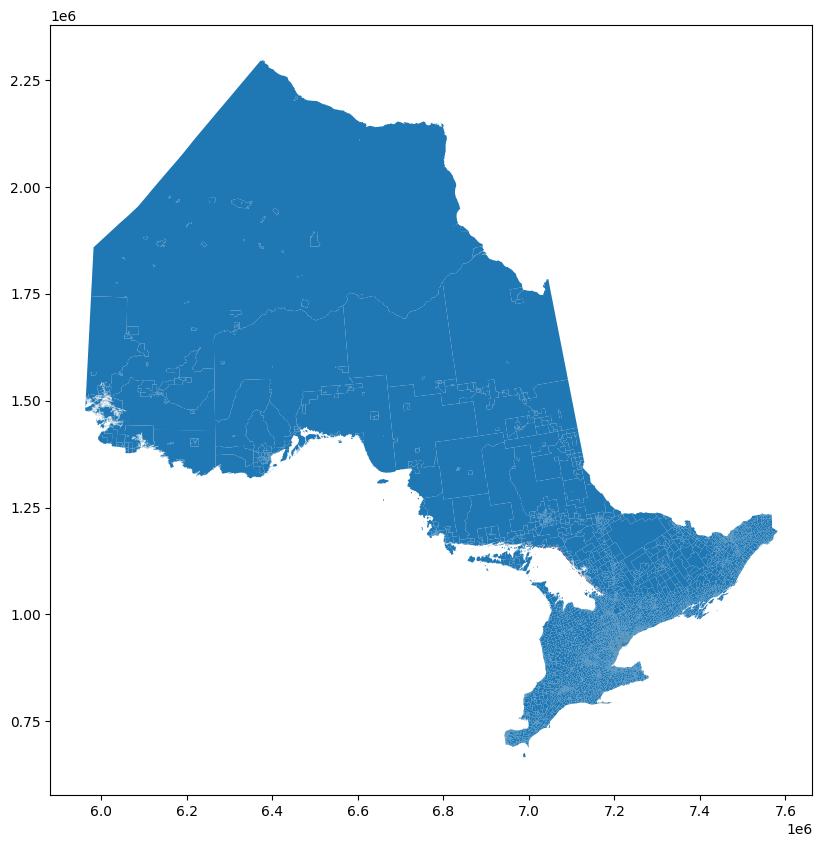

In [ ]:
shpON.plot(figsize=(20,10))

In [ ]:
shp_w_finalz = pd.merge(shpON, finalz_cleaned, how='outer', left_on=shpON.DGUID, right_on=finalz_cleaned.DGUID)  
shp_w_finalz

key_0     DAUID            DGUID_x  LANDAREA PRUID  \
0      2021S051235010155  35010155  2021S051235010155   65.4855    35   
1      2021S051235010156  35010156  2021S051235010156   53.6587    35   
2      2021S051235010157  35010157  2021S051235010157   66.4855    35   
3      2021S051235010158  35010158  2021S051235010158   39.0001    35   
4      2021S051235010159  35010159  2021S051235010159   36.0102    35   
...                  ...       ...                ...       ...   ...   
21136   2021A00053558059       NaN                NaN       NaN   NaN   
21137   2021A00053558062       NaN                NaN       NaN   NaN   
21138   2021A00053558066       NaN                NaN       NaN   NaN   
21139   2021A00053558068       NaN                NaN       NaN   NaN   
21140   2021A00053558075       NaN                NaN       NaN   NaN   

                                                geometry            DGUID_y  \
0      POLYGON ((7558590.434 1210287.346, 7558004.229...  2021S051235010155   
1      POLYGON ((7564496.469 1214012.634, 7564523.649...  2021S051235010156   
2      POLYGON ((7554559.837 1208436.143, 7554964.286...  2021S051235010157   
3      POLYGON ((7568683.397 1212570.343, 7568684.897...  2021S051235010158   
4      POLYGON ((7569410.889 1201398.920, 7569313.789...  2021S051235010159   
...                                                  ...                ...   
21136                                               None   2021A00053558059   
21137                                               None   2021A00053558062   
21138                                               None   2021A00053558066   
21139                                               None   2021A00053558068   
21140                                               None   2021A00053558075   

       GEO_NAME           GEO_LEVEL  (C1_COUNT_TOTAL, 10,     0 to 4 years)  \
0      35060146  Dissemination area                                    20.0   
1      35060147  Dissemination area                                    15.0   
2      35060148  Dissemination area                                    15.0   
3      35060149  Dissemination area                                    20.0   
4      35060150  Dissemination area                                    30.0   
...         ...                 ...                                     ...   
21136  35060126  Dissemination area                                   135.0   
21137  35060129  Dissemination area                                    25.0   
21138  35060135  Dissemination area                                    85.0   
21139  35060138  Dissemination area                                    45.0   
21140  35060141  Dissemination area                                   240.0   

       ...  \
0      ...   
1      ...   
2      ...   
3      ...   
4      ...   
...    ...   
21136  ...   
21137  ...   
21138  ...   
21139  ...   
21140  ...   

       (C3_COUNT_WOMEN+, 721, Total - Language spoken most often at home for the total population excluding institutional residents - 100% data)  \
0                                                  225.0                                                                                           
1                                                  215.0                                                                                           
2                                                  220.0                                                                                           
3                                                  245.0                                                                                           
4                                                  245.0                                                                                           
...                                                  ...                                                                                           
21136                                  

In [ ]:
shp_w_finalz = shp_w_finalz.drop(columns=['key_0','DGUID_x'])
shp_w_finalz

DAUID  LANDAREA PRUID  \
0      35010155   65.4855    35   
1      35010156   53.6587    35   
2      35010157   66.4855    35   
3      35010158   39.0001    35   
4      35010159   36.0102    35   
...         ...       ...   ...   
21136       NaN       NaN   NaN   
21137       NaN       NaN   NaN   
21138       NaN       NaN   NaN   
21139       NaN       NaN   NaN   
21140       NaN       NaN   NaN   

                                                geometry            DGUID_y  \
0      POLYGON ((7558590.434 1210287.346, 7558004.229...  2021S051235010155   
1      POLYGON ((7564496.469 1214012.634, 7564523.649...  2021S051235010156   
2      POLYGON ((7554559.837 1208436.143, 7554964.286...  2021S051235010157   
3      POLYGON ((7568683.397 1212570.343, 7568684.897...  2021S051235010158   
4      POLYGON ((7569410.889 1201398.920, 7569313.789...  2021S051235010159   
...                                                  ...                ...   
21136                                               None   2021A00053558059   
21137                                               None   2021A00053558062   
21138                                               None   2021A00053558066   
21139                                               None   2021A00053558068   
21140                                               None   2021A00053558075   

       GEO_NAME           GEO_LEVEL  (C1_COUNT_TOTAL, 10,     0 to 4 years)  \
0      35060146  Dissemination area                                    20.0   
1      35060147  Dissemination area                                    15.0   
2      35060148  Dissemination area                                    15.0   
3      35060149  Dissemination area                                    20.0   
4      35060150  Dissemination area                                    30.0   
...         ...                 ...                                     ...   
21136  35060126  Dissemination area                                   135.0   
21137  35060129  Dissemination area                                    25.0   
21138  35060135  Dissemination area                                    85.0   
21139  35060138  Dissemination area                                    45.0   
21140  35060141  Dissemination area                                   240.0   

       (C1_COUNT_TOTAL, 11,     5 to 9 years)  \
0                                        10.0   
1                                        10.0   
2                                        25.0   
3                                        30.0   
4                                        25.0   
...                                       ...   
21136                                   170.0   
21137                                    30.0   
21138                                   105.0   
21139                                    60.0   
21140                                   245.0   

       (C1_COUNT_TOTAL, 12,     10 to 14 years)  ...  \
0                                          30.0  ...   
1                                          20.0  ...   
2                                          25.0  ...   
3                                          20.0  ...   
4                                          25.0  ...   
...                                         ...  ...   
21136                                     175.0  ...   
21137                                      35.0  ...   
21138                                      90.0  ...   
21139                                      40.0  ...   
21140                                     240.0  ...   

       (C3_COUNT_WOMEN+, 721, Total - Language spoken most often at home for the total population excluding institutional residents - 100% data)  \
0                                                  225.0                                                                                           
1                                                  215.0                                                                             

In [ ]:
shp_w_finalz = shp_w_finalz.rename(columns={'DGUID_y':'DGUID'})
shp_w_finalz

DAUID  LANDAREA PRUID  \
0      35010155   65.4855    35   
1      35010156   53.6587    35   
2      35010157   66.4855    35   
3      35010158   39.0001    35   
4      35010159   36.0102    35   
...         ...       ...   ...   
21136       NaN       NaN   NaN   
21137       NaN       NaN   NaN   
21138       NaN       NaN   NaN   
21139       NaN       NaN   NaN   
21140       NaN       NaN   NaN   

                                                geometry              DGUID  \
0      POLYGON ((7558590.434 1210287.346, 7558004.229...  2021S051235010155   
1      POLYGON ((7564496.469 1214012.634, 7564523.649...  2021S051235010156   
2      POLYGON ((7554559.837 1208436.143, 7554964.286...  2021S051235010157   
3      POLYGON ((7568683.397 1212570.343, 7568684.897...  2021S051235010158   
4      POLYGON ((7569410.889 1201398.920, 7569313.789...  2021S051235010159   
...                                                  ...                ...   
21136                                               None   2021A00053558059   
21137                                               None   2021A00053558062   
21138                                               None   2021A00053558066   
21139                                               None   2021A00053558068   
21140                                               None   2021A00053558075   

       GEO_NAME           GEO_LEVEL  (C1_COUNT_TOTAL, 10,     0 to 4 years)  \
0      35060146  Dissemination area                                    20.0   
1      35060147  Dissemination area                                    15.0   
2      35060148  Dissemination area                                    15.0   
3      35060149  Dissemination area                                    20.0   
4      35060150  Dissemination area                                    30.0   
...         ...                 ...                                     ...   
21136  35060126  Dissemination area                                   135.0   
21137  35060129  Dissemination area                                    25.0   
21138  35060135  Dissemination area                                    85.0   
21139  35060138  Dissemination area                                    45.0   
21140  35060141  Dissemination area                                   240.0   

       (C1_COUNT_TOTAL, 11,     5 to 9 years)  \
0                                        10.0   
1                                        10.0   
2                                        25.0   
3                                        30.0   
4                                        25.0   
...                                       ...   
21136                                   170.0   
21137                                    30.0   
21138                                   105.0   
21139                                    60.0   
21140                                   245.0   

       (C1_COUNT_TOTAL, 12,     10 to 14 years)  ...  \
0                                          30.0  ...   
1                                          20.0  ...   
2                                          25.0  ...   
3                                          20.0  ...   
4                                          25.0  ...   
...                                         ...  ...   
21136                                     175.0  ...   
21137                                      35.0  ...   
21138                                      90.0  ...   
21139                                      40.0  ...   
21140                                     240.0  ...   

       (C3_COUNT_WOMEN+, 721, Total - Language spoken most often at home for the total population excluding institutional residents - 100% data)  \
0                                                  225.0                                                                                           
1                                                  215.0                                                                             

In [ ]:
shp_w_finalz.shape

(21141, 175)

In [ ]:
shp_w_finalz.dropna(inplace=True)
shp_w_finalz.shape

(19778, 175)

In [ ]:
shp_w_finalz.to_csv(r'/Users/mvbasxhr/Downloads/Census2021/shp_w_finalz.csv')

In [ ]:
shp_s = shp[ shp.DGUID.isin(finalz.DGUID.unique()) ]

In [ ]:
shp_s.shape

(20465, 5)

In [ ]:
print(*df_merged.columns)

DGUID GEO_NAME GEO_LEVEL total_id9_0-to-4-years total_id10_5-to-9-years total_id11_10-to-14-years total_id13_15-to-19-years total_id14_20-to-24-years total_id15_25-to-29-years total_id16_30-to-34-years total_id17_35-to-39-years total_id18_40-to-44-years total_id19_45-to-49-years total_id20_50-to-54-years total_id21_55-to-59-years total_id22_60-to-64-years total_id24_65-to-69-years total_id25_70-to-74-years total_id26_75-to-79-years total_id27_80-to-84-years total_id29_85-to-89-years total_id30_90-to-94-years total_id31_95-to-99-years total_id32_100-years-and-over total_id179_total---employment-income-groups-in-2020-for-the-population-aged-15-years-and-over-in-private-households---100%-data total_id182_under-$5,000-(including-loss) total_id183_$5,000-to-$9,999 total_id184_$10,000-to-$19,999 total_id185_$20,000-to-$29,999 total_id186_$30,000-to-$39,999 total_id187_$40,000-to-$49,999 total_id188_$50,000-to-$59,999 total_id189_$60,000-to-$69,999 total_id190_$70,000-to-$79,999 total_id191_$

In [ ]:
df_merged.loc[:,'women_id595_bengali']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
19773    0.0
19774    0.0
19775    0.0
19776    0.0
19777    0.0
Name: women_id595_bengali, Length: 19778, dtype: float64

<h1> Might have to drop the rows in finalz that don't match shp_s <h1>

In [ ]:
shp_s.to_file(r'/Users/mvbasxhr/Downloads/Census2021/shp_subset.shp')

<!DOCTYPE html>
<html>
<head>
<style>
h1 {
  color:rgb(255, 20, 147);
  font-family: verdana;
  font-size: 300%;
}
</style>
</head>
<body>

<h1>PAGE ENDS HERE</h1>

</body>
</html>

In [ ]:
df_CT['GEO_LEVEL'].value_counts()

Dissemination area    28389116
Census subdivision      800299
Census division          67963
Country                   1387
Province                  1387
Name: GEO_LEVEL, dtype: int64

<h4> now, i want to see why these particular Char.Names are repeated, what is it that they contain? </h4>

In [ ]:
'waterloo' in df[df["GEO_LEVEL"]=='Census subdivision'].drop_duplicates(subset=['GEO_NAME'])["GEO_NAME"]

False

In [ ]:
z[z.duplicated(keep=False)].nunique()

393

In [ ]:
z[z.duplicated()].value_counts()

  65 years and over                   5
  English and French                  3
  18 to 64 years                      3
  0 to 17 years                       3
    0 to 5 years                      3
                                     ..
          Gitxsan (Gitksan)           1
        Tsimshian languages           1
          Siouan languages, n.i.e.    1
          Stoney                      1
  Multiple non-official languages     1
Name: CHARACTERISTIC_NAME, Length: 393, dtype: int64

In [ ]:
@app.callback(
    Output("graph", "figure"), 
    Input("candidate", "value")
    
def display_choropleth(candidate):
    df = px.data.election() # replace with your own data source
    geojson = px.data.election_geojson()

    fig = px.choropleth_mapbox(df,
                               geojson=geojson,
                               locations="district",
                             \  color=candidate,
                             \  featureidkey="properties.district",
                               center={"lat": 45.5517, "lon": -73.7073},
                               zoom=9,
                               range_color=[0, 6500])
    fig.update_layout(
        margin={"r":0,"t":0,"l":0,"b":0},
        mapbox_accesstoken=token)

    return fig

In [ ]:
import geopandas as gpd
geodf = gpd.read_file('/Users/mvbasxhr/Downloads/Census2021/DA border shp file/lda_000b21a_e.shp')
geodf_ON = geodf.loc[geodf.PRUID == '35', :]
geodf_ON.to_file("/Users/mvbasxhr/Downloads/Census2021/DA border shp file/geoDF_ON.geojson", driver = "GeoJSON")


DAUID              DGUID  LANDAREA PRUID  \
0      10010165  2021S051210010165    0.3817    10   
1      10010166  2021S051210010166    0.0954    10   
2      10010167  2021S051210010167    0.1265    10   
3      10010168  2021S051210010168    0.1911    10   
4      10010169  2021S051210010169    0.0662    10   
...         ...                ...       ...   ...   
57927  62080024  2021S051262080024    0.4006    62   
57928  62080025  2021S051262080025  287.3941    62   
57929  62080026  2021S051262080026  251.5981    62   
57930  62080027  2021S051262080027   24.6458    62   
57931  62080028  2021S051262080028    3.9004    62   

                                                geometry  
0      POLYGON ((8978199.943 2146681.889, 8978191.283...  
1      POLYGON ((8978655.237 2146599.654, 8978545.646...  
2      POLYGON ((8978582.477 2146647.180, 8978545.486...  
3      POLYGON ((8978846.749 2147522.749, 8978855.369...  
4      POLYGON ((8978347.594 2146972.786, 8978272.194...  
...                                                  ...  
57927  POLYGON ((5692727.891 3672467.174, 5692835.757...  
57928  MULTIPOLYGON (((5263454.031 3662224.177, 52634...  
57929  MULTIPOLYGON (((5273326.123 3651158.637, 52732...  
57930  POLYGON ((6043994.743 3573170.097, 6043992.391...  
57931  MULTIPOLYGON (((6043125.089 3568426.163, 60431...  

[57932 rows x 5 columns]

In [ ]:
geodf_ON = geodf.loc[geodf.PRUID == '35', :]

In [ ]:
geodf_ON.to_file("/Users/mvbasxhr/Downloads/Census2021/DA border shp file/geoDF_ON.geojson", driver = "GeoJSON")


In [ ]:
geodf.to_file("/Users/mvbasxhr/Downloads/Census2021/DA border shp file/geoDF.geojson", driver = "GeoJSON")


In [ ]:
import json

geofile = open("/Users/mvbasxhr/Downloads/Census2021/DA border shp file/geoDF_ON.geojson") 
j_file_ON = json.load(geofile)


In [ ]:
del j_file_ON, z 

# **This creates and and adds id to shp.json**

In [1]:
import geopandas as gpd
geodf = gpd.read_file('/Users/mvbasxhr/Downloads/Census2021/DA border shp file/lda_000b21a_e.shp')
geodf_ON = geodf.loc[geodf.PRUID == '35', :]


In [5]:
geodf_ON.DGUID

18346    2021S051235010155
18347    2021S051235010156
18348    2021S051235010157
18349    2021S051235010158
18350    2021S051235010159
               ...        
38806    2021S051235600408
38807    2021S051235600409
38808    2021S051235600410
38809    2021S051235600411
38810    2021S051235600412
Name: DGUID, Length: 20465, dtype: object

In [9]:
pr = set()
cd1 = []
cd_set = set()
#da = set()
for dguid in geodf_ON.DGUID.values:
    pr.add(dguid[9:11])
    cd1.append(dguid[11:13])
    cd_set.add(dguid[11:13])
    #da.add(dguid[13:17])


TypeError: 'set' object is not subscriptable

In [3]:
len(cd1)

20465

In [4]:
flag = 0
cd_sorted = cd1[:]
cd_sorted.sort()
if (cd_sorted == cd1):
    flag = 1
      
# printing result
if (flag) :
    print ("Yes, List is sorted.")
else :
    print ("No, List is not sorted.")

Yes, List is sorted.


In [6]:
cd_set = list(cd_set)

In [ ]:
so i just wanna know how many times a particular cd repeats before the next one
index = 0
count = 0
value_pointer = cd1[index]
tracker = [] #this will hold the number of each CDs
total_count = 0 #this is for making sure outer loop only runs for the length of the cd1 list
while total_count != len(cd1):
    while value_pointer == cd1[index]:
        count += 1
        index += 1
    tracker.append(count)
    count = 0
    value_pointer = cd1[index]


In [14]:
del cd, csd, pr

In [ ]:
so i want to make 49 seperate json files lol i guess, one for each CD, so i add dguids to new list until 

In [4]:
cd_list = cd1


In [ ]:
geodf_ON.shape

In [6]:
List_of_Cds_with_their_respective_rows = []
for index, cd in enumerate(cd_list):
    x = []
    for dguid_row_index,dguid in enumerate(geodf_ON.DGUID.values): 
        
        if cd == dguid[11:13]:
            x.append(geodf_ON.iloc[dguid_row_index]) 
    List_of_Cds_with_their_respective_rows.append(x)


KeyboardInterrupt: 

In [23]:
len(List_of_Cds_with_their_respective_rows)

0

In [ ]:
geodf_ON.to_file("/Users/mvbasxhr/Downloads/Census2021/DA border shp file/geoDF_ON.geojson", driver = "GeoJSON")

import json
with open("/Users/mvbasxhr/Downloads/Census2021/DA border shp file/geoDF_ON.geojson", "r") as jsonFile:
    data_ON = json.load(jsonFile)

In [3]:
for feature in data_ON['features']:
    feature['id'] = feature['properties']['DGUID']


In [4]:
data_ON

{'type': 'FeatureCollection',
 'crs': {'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:EPSG::3347'}},
 'features': [{'type': 'Feature',
   'properties': {'DAUID': '35010155',
    'DGUID': '2021S051235010155',
    'LANDAREA': 65.4855,
    'PRUID': '35'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[7558590.4342857525, 1210287.3457143195],
      [7558004.228571467, 1209653.3371428922],
      [7557596.328571469, 1209218.6371428892],
      [7557444.70571433, 1209060.3371428922],
      [7557411.742857181, 1209034.48571432],
      [7557402.5657143295, 1209041.7257143185],
      [7557388.92857147, 1209052.480000034],
      [7557034.094285756, 1209391.6200000346],
      [7556622.857142895, 1209775.3914286047],
      [7556369.502857186, 1209499.8171428926],
      [7556044.4342857525, 1209155.1600000337],
      [7555594.348571472, 1208685.82571432],
      [7554964.285714328, 1208034.677142892],
      [7554559.8371429, 1208436.1428571753],
      [7554394.217142895, 1208602.022

In [5]:
with open("/Users/mvbasxhr/Downloads/Census2021/DA border shp file/shp_ON.geojson", "w") as jsonFile:
    json.dump(data_ON, jsonFile)


In [ ]:
for feature in data_ON['features']:
    feature['id'] = feature['properties']['DGUID']


In [ ]:

#with open("/Users/mvbasxhr/Downloads/Census2021/DA border shp file/geoDF_ON.geojson", "w") as jsonFile:
    json.dump(data_ON, jsonFile)

In [ ]:
testData = j_file["features"][0:3]

In [ ]:
len(testData[0]['geometry']['coordinates'][0])

239

In [ ]:
for feature in testData:
    feature['id'] = feature['properties']['DGUID']

NameError: name 'testData' is not defined

In [ ]:
count=0
for feature in j_file["features"]:
    count = count + len(feature['geometry']['coordinates'][0])
count

2330446

In [ ]:
import pandas as pd

finalz = pd.read_csv("finalz.csv")

In [ ]:
finalz

Unnamed: 0              key_0              DGUID  \
0               0     2021A000011124     2021A000011124   
1               1        2021A000235        2021A000235   
2               2      2021A00033501      2021A00033501   
3               3      2021A00033502      2021A00033502   
4               4      2021A00033506      2021A00033506   
...           ...                ...                ...   
20945       20945  2021S051235580479  2021S051235580479   
20946       20946  2021S051235580483  2021S051235580483   
20947       20947  2021S051235580484  2021S051235580484   
20948       20948  2021S051235580485  2021S051235580485   
20949       20949  2021S051235580486  2021S051235580486   

                                                GEO_NAME           GEO_LEVEL  \
0                                                 Canada             Country   
1                                                Ontario            Province   
2      Stormont, Dundas and Glengarry, United countie...     Census division   
3                         South Glengarry, Township (TP)  Census subdivision   
4                                               35010159  Dissemination area   
...                                                  ...                 ...   
20945                   Aroland, Indian settlement (S-É)  Census subdivision   
20946                                           35580364  Dissemination area   
20947                 Lake Nipigon, Indian reserve (IRI)  Census subdivision   
20948                                           35580479  Dissemination area   
20949  Ojibway Nation of Saugeen (Savant Lake), India...  Census subdivision   

       ('DGUID', '', '')  ('C1_COUNT_TOTAL', 10, '    0 to 4 years')  \
0         2021A000011124                                   1831195.0   
1            2021A000235                                    683515.0   
2          2021A00033501                                      5565.0   
3          2021A00033502                                      5025.0   
4          2021A00033506                                     48790.0   
...                  ...                                         ...   
20945  2021S051235580479                                         NaN   
20946  2021S051235580483                                         NaN   
20947  2021S051235580484                                        15.0   
20948  2021S051235580485                                        40.0   
20949  2021S051235580486                                        55.0   

       ('C1_COUNT_TOTAL', 11, '    5 to 9 years')  \
0                                       2054900.0   
1                                        764430.0   
2                                          6190.0   
3                                          5540.0   
4                                         57410.0   
...                                           ...   
20945                                         NaN   
20946                                         NaN   
20947                                        20.0   
20948                                        30.0   
20949                                        75.0   

       ('C1_COUNT_TOTAL', 12, '    10 to 14 years')  \
0                                         2126705.0   
1                                          803850.0   
2                                            6275.0   
3                                            5540.0   
4                                           60720.0   
...                                             ...   
20945                                           NaN   
20946                                           NaN   
20947                                          20.0   
20948                                          30.0   
20949                                          65.0   

       ('C1_COUNT_TOTAL', 14, '    15 to 19 years')  ...  \
0                                         2012975.0  ...   
1                                          801455.0  .

In [ ]:
z = finalz.drop(columns=['key_0',finalz.columns[5],finalz.columns[0]])

In [ ]:
import pandas as pd
df = pd.read_csv("/Users/mvbasxhr/Cool Stuff/inequalityExplorer/98-401-X2021006_eng_CSV/98-401-X2021006_English_CSV_data_Ontario.csv",encoding='latin-1')
subset1 = df.loc[((df['CHARACTERISTIC_ID'] == 180)) | 
                    ((df['CHARACTERISTIC_ID'] >= 183) & 
                    (df['CHARACTERISTIC_ID'] <= 196)) |
                    ((df['CHARACTERISTIC_ID'] >= 10) & 
                    (df['CHARACTERISTIC_ID'] <= 12)) |
                    ((df['CHARACTERISTIC_ID'] >= 14) & 
                    (df['CHARACTERISTIC_ID'] <= 23)) |
                    ((df['CHARACTERISTIC_ID'] >= 25) & 
                    (df['CHARACTERISTIC_ID'] <= 28)) |
                    ((df['CHARACTERISTIC_ID'] >= 30) & 
                    (df['CHARACTERISTIC_ID'] <= 33)) |
                    (df['CHARACTERISTIC_ID'] == 379) |
                    (df['CHARACTERISTIC_ID'] == 489) |
                    (df['CHARACTERISTIC_ID'] == 493) |
                    (df['CHARACTERISTIC_ID'] == 596) |
                    (df['CHARACTERISTIC_ID'] == 600) |
                    (df['CHARACTERISTIC_ID'] == 611) |
                    (df['CHARACTERISTIC_ID'] == 615) |
                    (df['CHARACTERISTIC_ID'] == 617) |
                    (df['CHARACTERISTIC_ID'] == 621) |
                    (df['CHARACTERISTIC_ID'] == 695) |
                    (df['CHARACTERISTIC_ID'] == 721) |
                    (df['CHARACTERISTIC_ID'] == 831) |
                    (df['CHARACTERISTIC_ID'] == 835) |
                    (df['CHARACTERISTIC_ID'] == 938) |
                    (df['CHARACTERISTIC_ID'] == 942) |
                    (df['CHARACTERISTIC_ID'] == 953) |
                    (df['CHARACTERISTIC_ID'] == 957) |
                    (df['CHARACTERISTIC_ID'] == 959) |
                    (df['CHARACTERISTIC_ID'] == 963) |
                    (df['CHARACTERISTIC_ID'] == 1037),
                    ['DGUID',
                     'GEO_LEVEL',
                     'GEO_NAME',
                     'CHARACTERISTIC_ID',
                     'CHARACTERISTIC_NAME',
                     'C1_COUNT_TOTAL',
                     'C2_COUNT_MEN+',
                     'C3_COUNT_WOMEN+']]


/var/folders/k_/h4ll7zh10pb0p9z2t0kh6cm80000gn/T/ipykernel_4714/2249960845.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/mvbasxhr/Cool Stuff/inequalityExplorer/98-401-X2021006_eng_CSV/98-401-X2021006_English_CSV_data_Ontario.csv",encoding='latin-1')


In [ ]:
subset1.to_csv('subset1.csv')

In [ ]:
import pandas as pd
subset1 = pd.read_csv('subset1.csv')
charNames = subset1.drop_duplicates(subset='CHARACTERISTIC_ID')['CHARACTERISTIC_NAME']
newCols = []
C1_list = ['total','men','women']
for i in C1_list:
    for count in range(len(charNames.index)):
        newCols.append((i + "_id" + str(charNames.index[count]) + "_" + charNames.values[count].strip().lower().replace(" ","-")))

x = ['DGUID', 'GEO_NAME', 'GEO_LEVEL']
x.extend(newCols)
x = x.set_index('DGUID')



/var/folders/k_/h4ll7zh10pb0p9z2t0kh6cm80000gn/T/ipykernel_5212/555616987.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  subset1 = pd.read_csv('subset1.csv')


AttributeError: 'list' object has no attribute 'set_index'

In [ ]:
finalz = pd.read_csv("finalz.csv")
z = finalz.drop(columns=['key_0',finalz.columns[5],finalz.columns[0]])
z.columns = x
z = z.set_index('DGUID')

In [ ]:
z.to_csv('/Users/mvbasxhr/Cool Stuff/inequalityExplorer/z.csv')

In [ ]:
del geoDF, geodf_ON

# This loads shp.json + df and plots the map

In [1]:
import plotly.express as px
import pandas as pd
import json

with open("/Users/mvbasxhr/Downloads/Census2021/DA border shp file/shp_ON.geojson", "r") as jsonFile:
    j_file_ON = json.load(jsonFile)
    


In [2]:
len(j_file_ON['features'])

20465

In [ ]:
z = pd.read_csv('/Users/mvbasxhr/Cool Stuff/inequalityExplorer/z.csv', index_col='DGUID')  

In [ ]:
z = z.loc[:,['{}'.format('women_id39_bengali')]]
z = z.fillna(value=int(0))
from scipy import stats
import numpy as np
z = z[(np.abs(stats.zscore(z)) < 3).all(axis=1)]


In [ ]:
j_file_ON

{'type': 'FeatureCollection',
 'crs': {'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:EPSG::3347'}},
 'features': []}

In [ ]:
z['women_id39_bengali'].values.sort()
z['women_id39_bengali'].values[::-1]

array([42425., 27085., 15290., ...,     0.,     0.,     0.])

In [ ]:
from scipy import stats
import numpy as np
z = z[(np.abs(stats.zscore(z)) < 3).all(axis=1)]


In [ ]:
smol = z.loc[~(z==0).all(axis=1)]


In [ ]:
smol.shape

(2453, 1)

In [ ]:
del noAnomalies

In [ ]:
import plotly.express as px

fig = px.choropleth_mapbox(z,
                           geojson=j_file_ON,
                           locations=z.index,
                           color='women_id39_bengali',
                           #featureidkey='properties.index',
                           center={"lat": 43.4620, "lon": -80.5097},
                           mapbox_style="carto-positron",
                           zoom=8.5)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()